# Curved Duct Flow Class Test

This serves as a brief test, and also a usage example, for my python class which implements a finite difference method for estimating the flow through curved rectangular ducts.

Brendan Harding, 2019.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from CurvedDuctFlowClass import CurvedDuctFlowClass

Solving for K=500.0
    relative errors: 0.24063894695576607 0.5524683437863338
    relative errors: 0.08906024235425986 0.2605338723793088
    relative errors: 0.012187453625438355 0.02459386019849262
    relative errors: 0.0001973302746580333 0.00023049162975157254
    relative errors: 2.6507852493782738e-08 2.579832326794073e-08
    relative errors: 5.219860514477976e-16 9.560021290051215e-16
    converged!
Plotting solutions:


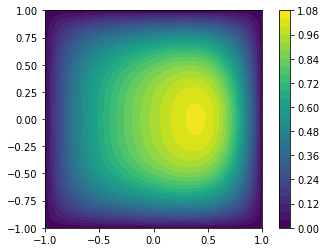

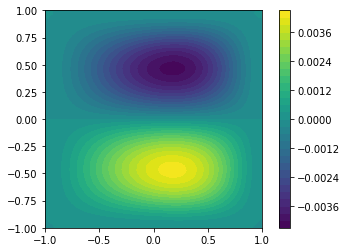

Plotting PDE residuals:


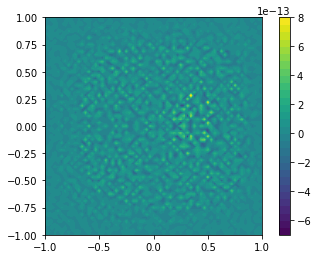

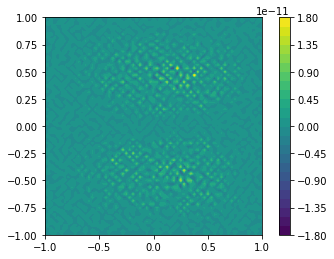

Solving for K=5000.0 via ramping
Convergence for K= 1000.0  reached in  3  iterations (err,tol= 0.00027339513895661846 0.001 )
Convergence for K= 1500.0  reached in  3  iterations (err,tol= 2.792361097571974e-05 0.001 )
Convergence for K= 2000.0  reached in  3  iterations (err,tol= 9.248558103278371e-06 0.001 )
Convergence for K= 2500.0  reached in  3  iterations (err,tol= 4.632659917436927e-06 0.001 )
Convergence for K= 3000.0  reached in  3  iterations (err,tol= 2.868567367163463e-06 0.001 )
Convergence for K= 3500.0  reached in  3  iterations (err,tol= 1.8472144223536476e-06 0.001 )
Convergence for K= 4000.0  reached in  3  iterations (err,tol= 1.2361540295155114e-06 0.001 )
Convergence for K= 4500.0  reached in  3  iterations (err,tol= 8.577968182439345e-07 0.001 )
Convergence for K= 5000.0  reached in  4  iterations (err,tol= 3.1499693427823014e-13 1e-10 )
Plotting solutions:


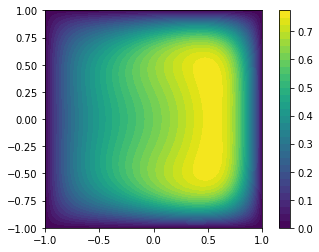

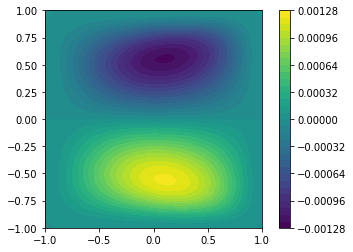

Plotting PDE residuals:


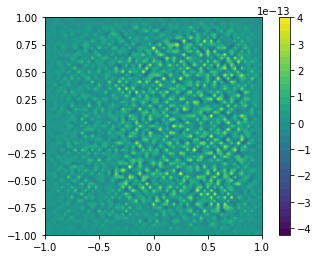

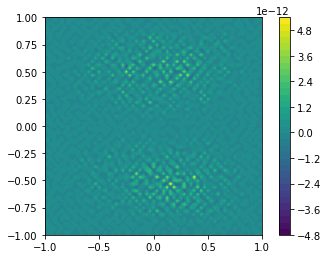

In [2]:
# Initialise a class instance with a given grid resolution and run the built-in test
CDFC = CurvedDuctFlowClass(65,65)
CDFC._solver_test()

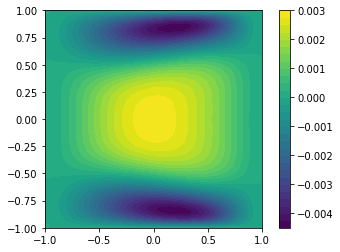

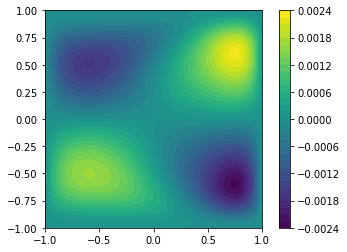

In [3]:
# Fetch and plot the secondary flow velocities from the stream-function
S,Z = CDFC.get_meshgrid()
V,W = CDFC.get_secondary_velocities()
plt.contourf(S,Z,V,32)
plt.colorbar()
plt.gca().set_aspect(1.0)
plt.show()
plt.contourf(S,Z,W,32)
plt.colorbar()
plt.gca().set_aspect(1.0)
plt.show()

Convergence for K= 5000.0  reached in  1  iterations (err,tol= 1.047004392918473e-16 0.001 )
Convergence for K= 5500.0  reached in  3  iterations (err,tol= 4.6173974856598227e-07 0.001 )
Convergence for K= 6000.0  reached in  4  iterations (err,tol= 2.023095519269805e-13 1e-10 )


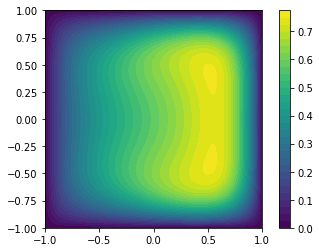

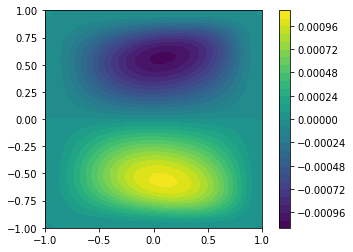

In [4]:
# Increase the Dean number, re-solve, then plot the new solution
CDFC.set_K(6000.0)
u,Phi = CDFC.solve(K_ramp=[5000.0,500.0],ramp_tol=1.0E-3,verbose=True)
plt.contourf(S,Z,u,32)
plt.gca().set_aspect(1.0)
plt.colorbar()
plt.show()
plt.contourf(S,Z,Phi,32)
plt.colorbar()
plt.gca().set_aspect(1.0)
plt.show()

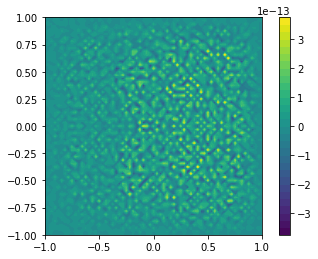

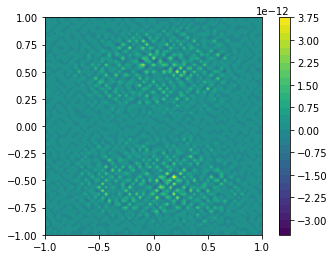

In [5]:
# Calculate and plot an approximation of the residual of the PDE equations
ru,rPhi = CDFC.get_PDE_residual(u,Phi)
plt.contourf(S,Z,ru,32)
plt.colorbar()
plt.gca().set_aspect(1.0)
plt.show()
plt.contourf(S,Z,rPhi,32)
plt.colorbar()
plt.gca().set_aspect(1.0)
plt.show()

In [6]:
# Optionally, run a quick convergence test (takes a minute or two)
CDFCs = [CurvedDuctFlowClass(2**n+1,2**n+1) for n in [6,7,8]]
sols = []
for instance in CDFCs:
    instance.set_K(1000.0)
    sols.append(instance.solve())
print('u relative convergence:')
print(np.linalg.norm((sols[2][0][::4,::4]-sols[0][0][:  ,:  ]).ravel()) \
      /np.linalg.norm(sols[2][0][::4,::4].ravel()))
print(np.linalg.norm((sols[2][0][::4,::4]-sols[1][0][::2,::2]).ravel()) \
      /np.linalg.norm(sols[2][0][::4,::4].ravel()))
print('u approximate convergence rate:')
print(np.linalg.norm((sols[2][0][::4,::4]-sols[0][0][:  ,:  ]).ravel()) \
      /np.linalg.norm((sols[2][0][::4,::4]-sols[1][0][::2,::2]).ravel()))
print('Phi relative convergence:')
print(np.linalg.norm((sols[2][1][::4,::4]-sols[0][1][:  ,:  ]).ravel()) \
      /np.linalg.norm(sols[2][1][::4,::4].ravel()))
print(np.linalg.norm((sols[2][1][::4,::4]-sols[1][1][::2,::2]).ravel()) \
      /np.linalg.norm(sols[2][1][::4,::4].ravel()))
print('Phi approximate convergence rate:')
print(np.linalg.norm((sols[2][1][::4,::4]-sols[0][1][:  ,:  ]).ravel()) \
      /np.linalg.norm((sols[2][1][::4,::4]-sols[1][1][::2,::2]).ravel()))

u relative convergence:
0.0008654454359118084
0.0001482391029857031
u approximate convergence rate:
5.838172374769942
Phi relative convergence:
0.0027056979660779047
0.0004446868711257651
Phi approximate convergence rate:
6.0845015712476185
